In [1]:
import wrangle
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:20,.2f}'.format

In [2]:
df = wrangle.get_zillow()
df = wrangle.prep_zillow(df)
df = wrangle.remove_outliers(df)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"46,983.00","12,972,159.09","2,213,462.46","10,711,855.00","11,529,375.00","12,616,765.00","14,123,093.50","162,960,814.00"
bathrooms,"46,983.00",2.16,0.82,1.00,2.00,2.00,3.00,5.50
bedrooms,"46,983.00",3.24,0.87,1.00,3.00,3.00,4.00,6.00
sqft,"46,983.00","1,763.71",713.92,152.00,"1,244.00","1,597.00","2,136.00","5,363.00"
fullbathcnt,"46,983.00",2.10,0.80,1.00,2.00,2.00,3.00,5.00
latitude,"46,983.00",34.02,0.27,33.34,33.83,34.01,34.19,34.72
garagecarcnt,"46,983.00",0.66,0.94,0.00,0.00,0.00,2.00,9.00
garagesqft,"46,983.00",167.10,239.13,0.00,0.00,0.00,430.00,"2,720.00"
longitude,"46,983.00",-118.19,0.35,-119.48,-118.39,-118.14,-117.93,-117.55
lotsize,"46,983.00","7,226.95","3,190.01",236.00,"5,472.00","6,650.00","8,100.00","21,510.00"


<AxesSubplot:>

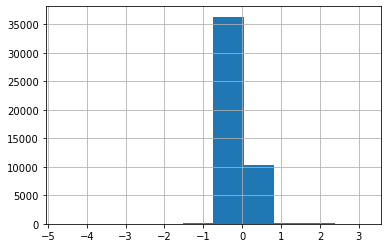

In [47]:
df.logerror.hist()

<AxesSubplot:>

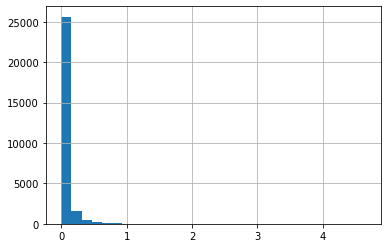

In [34]:
df.abserror.hist(bins=30)

In [39]:
train, validate, test = wrangle.my_split(df)

## is the (abs) log error for large garages significantly larger than the log error of all properties?

In [5]:
train[train.garagesqft > 800].abserror.mean()

0.10071510140628172

In [6]:
train.abserror.mean()

0.06932755433545618

In [7]:
df.shape

(46983, 25)

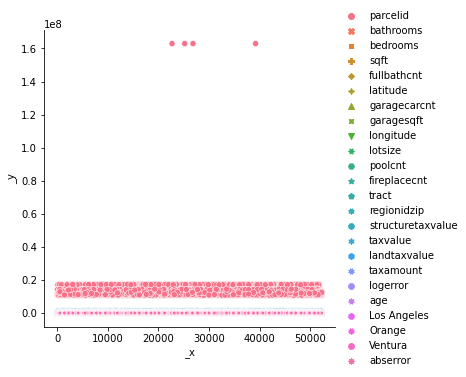

In [10]:
df.shape

(46983, 25)

<AxesSubplot:>

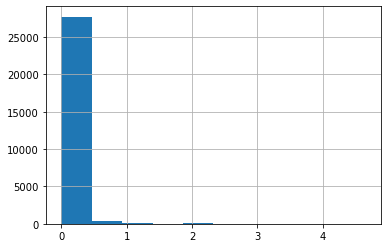

In [11]:
train.abserror.hist()

In [6]:
train['bigerror'] = np.where(train["abserror"] > 1, 1, 0)

In [7]:
big_error = train[train.bigerror == 1]

In [ ]:
df.zip

In [ ]:
cols = ['bathrooms', 'bedrooms', 'sqft', 'fullbathcnt',
       'latitude', 'garagecarcnt', 'garagesqft', 'longitude', 'lotsize',
       'poolcnt', 'fireplacecnt', 'roomcnt',
       'structuretaxvalue', 'taxvalue', 'landtaxvalue', 'taxamount',
       'logerror', 'age', 'abserror']

for col in cols:
    big_error[col].hist()
    plt.title(col)
    plt.show()

In [51]:
df.regionidzip.min()

95982.0

In [13]:
cats = [ 'regionidzip',
       'Los Angeles', 'Orange', 'Ventura', 'garagecarcnt', 'bathrooms', 'bedrooms', 'poolcnt']

nums = ['zipvaluerange', 'bathrooms', 'bedrooms', 'sqft', 'latitude', 'garagecarcnt', 'garagesqft', 'longitude', 'lotsize',
       'poolcnt', 'fireplacecnt', 'tract',  'age', 'taxvalue', 'landtaxvalue', 'taxamount', 'abserror','structuretaxvalue']

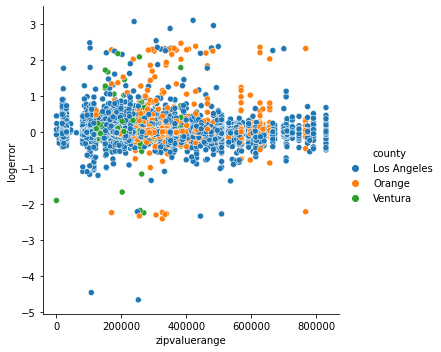

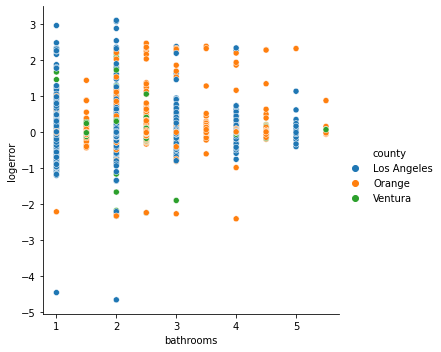

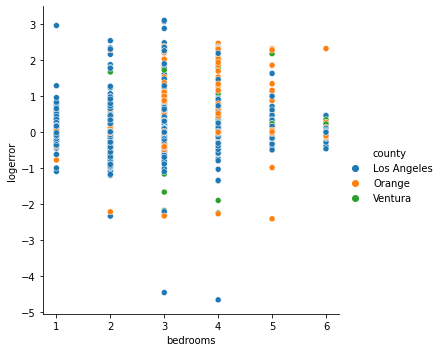

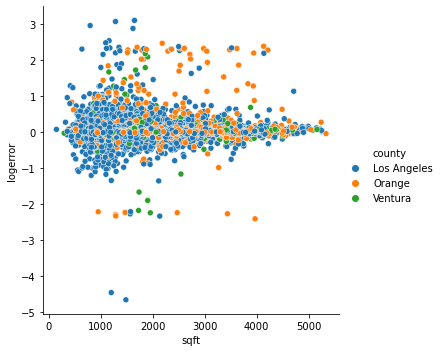

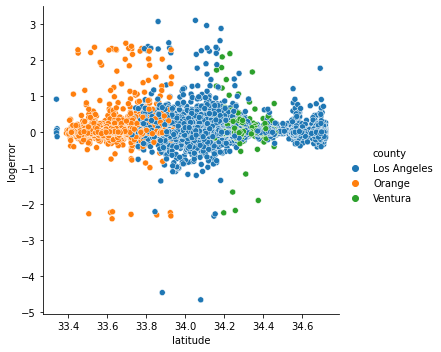

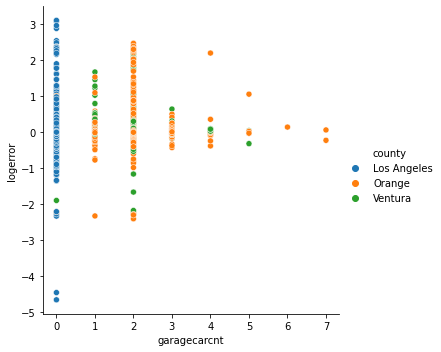

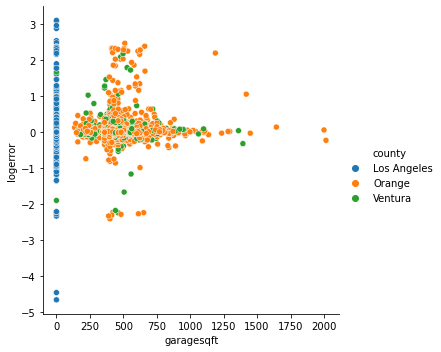

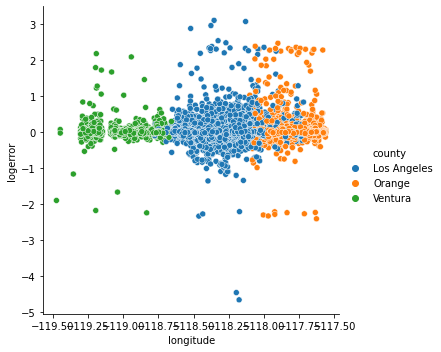

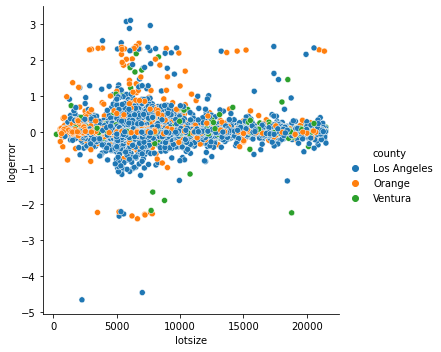

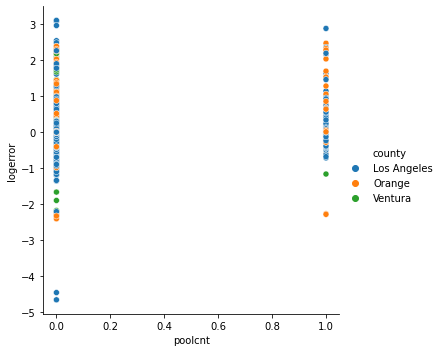

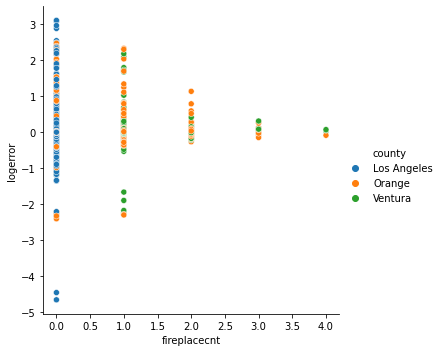

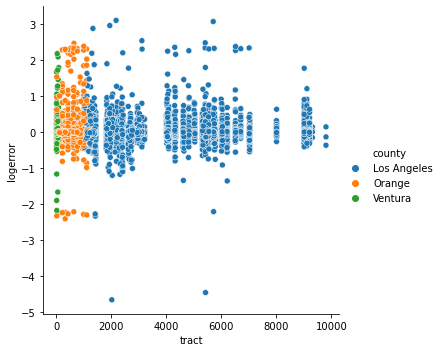

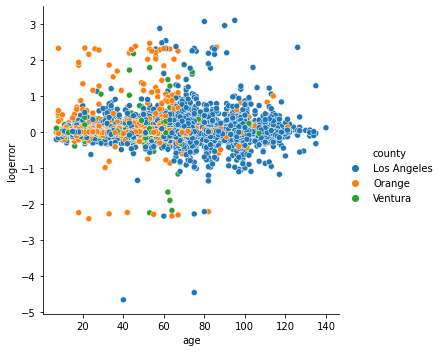

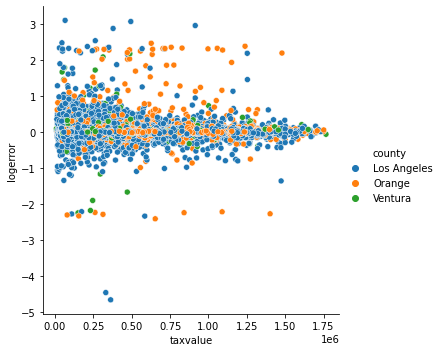

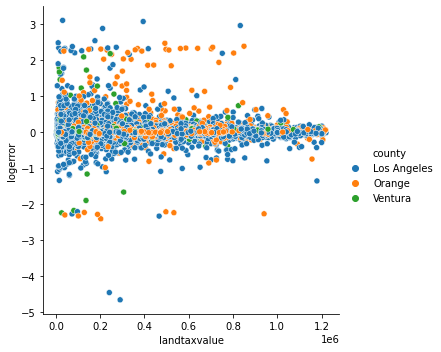

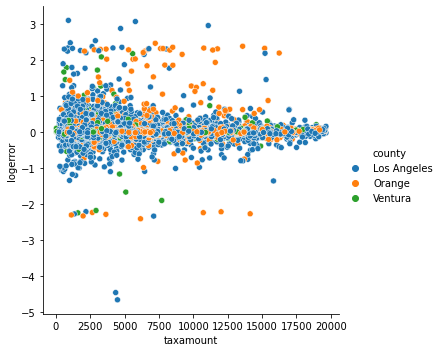

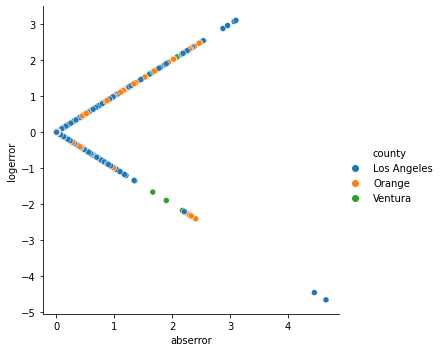

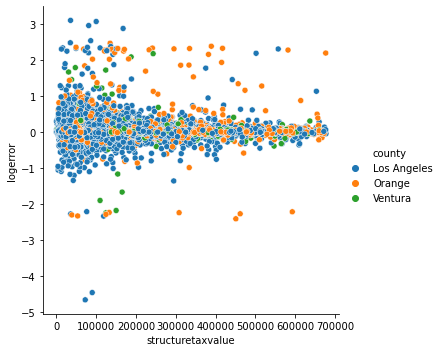

In [151]:
for num in nums:
    sns.relplot(data=train, x=num, y='logerror', hue='county')

Log error is largest:  
                       - when tax amount is lower (< 5000)
                       
                       - when tax value is low (< 400,000)
                       - when age is 20-60 years
                       - when lot size 5,000-10,000
                       - when sqft is 500-1500 (especially in orange county)
                       - Orange county
                       
                       

In [80]:
df.taxvalue.quantile(.25)

182185.5

In [145]:
zipdict = {}
for zipcode in set(df.regionidzip.values):
    zipcode = int(zipcode)
    zipdict[zipcode] = df[df.regionidzip == zipcode].landtaxvalue.quantile(0.75) - df[df.regionidzip == zipcode].landtaxvalue.quantile(.25).astype(int)

In [146]:
df['zipvaluerange'] = df['regionidzip'].astype(int)

In [147]:
df.zipvaluerange

0        96978
1        97099
2        97078
3        96330
5        96325
         ...  
52314    96204
52316    97116
52317    96480
52318    96171
52319    96488
Name: zipvaluerange, Length: 46983, dtype: int64

In [148]:
df['zipvaluerange'] = df['zipvaluerange'].map(zipdict)

In [149]:
df

,parcelid,bathrooms,bedrooms,sqft,county,fullbathcnt,latitude,garagecarcnt,garagesqft,longitude,...,taxvalue,landtaxvalue,taxamount,logerror,age,Los Angeles,Orange,Ventura,abserror,zipvaluerange
0,14297519,3.50,4.00,"3,100.00",Orange,3.00,33.63,2.00,633.00,-117.87,...,"1,023,282.00","537,569.00","11,013.72",0.03,24.00,0,1,0,0.03,"568,033.00"
1,17052889,1.00,2.00,"1,465.00",Ventura,1.00,34.45,1.00,0.00,-119.28,...,"464,000.00","376,000.00","5,672.48",0.06,55.00,0,0,1,0.06,"257,100.00"
2,14186244,2.00,3.00,"1,243.00",Orange,2.00,33.89,2.00,440.00,-117.82,...,"564,778.00","479,489.00","6,488.30",0.01,60.00,0,1,0,0.01,"326,417.00"
3,12177905,3.00,4.00,"2,376.00",Los Angeles,3.00,34.25,0.00,0.00,-118.24,...,"145,143.00","36,225.00","1,777.51",-0.10,52.00,1,0,0,0.10,"358,400.00"
5,12069064,1.00,2.00,738.00,Los Angeles,1.00,34.15,0.00,0.00,-118.24,...,"218,552.00","199,662.00","2,366.08",0.10,100.00,1,0,0,0.10,"371,762.25"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,12412492,2.00,4.00,"1,633.00",Los Angeles,2.00,33.87,0.00,0.00,-118.07,...,"346,534.00","221,068.00","4,175.08",0.00,60.00,1,0,0,0.00,"223,491.00"
52316,17239384,2.00,4.00,"1,612.00",Ventura,2.00,34.30,2.00,560.00,-118.71,...,"67,205.00","16,522.00","1,107.48",0.01,58.00,0,0,1,0.01,"197,592.00"
52317,12773139,1.00,3.00,"1,032.00",Los Angeles,1.00,34.04,0.00,0.00,-118.04,...,"49,546.00","16,749.00",876.43,0.04,68.00,1,0,0,0.04,"202,034.50"
52318,12826780,2.00,3.00,"1,762.00",Los Angeles,2.00,33.94,0.00,0.00,-118.00,...,"522,000.00","382,000.00","6,317.15",0.01,67.00,1,0,0,0.01,"235,843.25"


In [20]:
train[train.county=='Ventura'].abserror.mean()

0.05725537495807932

In [30]:
train[train.abserror >= .20].describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"1,831.00","12,634,711.81","1,567,657.69","10,712,007.00","11,539,438.00","12,220,614.00","13,872,419.50","17,294,173.00"
bathrooms,"1,831.00",1.96,0.87,1.00,1.00,2.00,2.50,5.50
bedrooms,"1,831.00",3.04,0.92,1.00,2.00,3.00,4.00,6.00
sqft,"1,831.00","1,634.91",745.15,326.00,"1,107.50","1,449.00","1,973.00","5,243.00"
fullbathcnt,"1,831.00",1.93,0.86,1.00,1.00,2.00,2.00,5.00
latitude,"1,831.00",34.02,0.24,33.34,33.87,34.03,34.16,34.72
garagecarcnt,"1,831.00",0.47,0.87,0.00,0.00,0.00,0.00,7.00
garagesqft,"1,831.00",118.09,220.47,0.00,0.00,0.00,0.00,"2,015.00"
longitude,"1,831.00",-118.22,0.31,-119.48,-118.38,-118.21,-118.01,-117.58
lotsize,"1,831.00","7,349.39","3,369.85",540.00,"5,444.00","6,710.00","8,249.00","21,508.00"


In [31]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,"28,189.00","12,979,242.72","2,487,671.81","10,711,923.00","11,520,758.00","12,611,916.00","14,122,359.00","162,960,814.00"
bathrooms,"28,189.00",2.16,0.82,1.00,2.00,2.00,3.00,5.50
bedrooms,"28,189.00",3.24,0.87,1.00,3.00,3.00,4.00,6.00
sqft,"28,189.00","1,760.69",711.87,152.00,"1,243.00","1,595.00","2,136.00","5,336.00"
fullbathcnt,"28,189.00",2.10,0.80,1.00,2.00,2.00,3.00,5.00
latitude,"28,189.00",34.02,0.27,33.34,33.83,34.01,34.19,34.72
garagecarcnt,"28,189.00",0.66,0.94,0.00,0.00,0.00,2.00,7.00
garagesqft,"28,189.00",166.67,239.05,0.00,0.00,0.00,430.00,"2,015.00"
longitude,"28,189.00",-118.19,0.35,-119.48,-118.39,-118.14,-117.93,-117.56
lotsize,"28,189.00","7,237.12","3,189.89",236.00,"5,475.00","6,653.00","8,120.00","21,510.00"


Properties with high variance:  LA county, higher age, higher value, larger land, no/smaller garage

<AxesSubplot:>

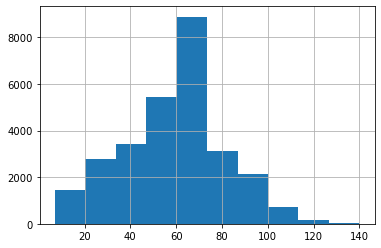

In [33]:
train.age.hist(bins=10)

In [37]:
df['dollarspersqft'] = df.taxvalue / df.sqft

,parcelid,bathrooms,bedrooms,sqft,county,fullbathcnt,latitude,garagecarcnt,garagesqft,longitude,...,taxvalue,landtaxvalue,taxamount,logerror,age,abserror,Los Angeles,Orange,Ventura,dollarspersqft
0,14297519,3.50,4.00,"3,100.00",Orange,3.00,33.63,2.00,633.00,-117.87,...,"1,023,282.00","537,569.00","11,013.72",0.03,24.00,0.03,0,1,0,330.09
1,17052889,1.00,2.00,"1,465.00",Ventura,1.00,34.45,1.00,0.00,-119.28,...,"464,000.00","376,000.00","5,672.48",0.06,55.00,0.06,0,0,1,316.72
2,14186244,2.00,3.00,"1,243.00",Orange,2.00,33.89,2.00,440.00,-117.82,...,"564,778.00","479,489.00","6,488.30",0.01,60.00,0.01,0,1,0,454.37
3,12177905,3.00,4.00,"2,376.00",Los Angeles,3.00,34.25,0.00,0.00,-118.24,...,"145,143.00","36,225.00","1,777.51",-0.10,52.00,0.10,1,0,0,61.09
5,12069064,1.00,2.00,738.00,Los Angeles,1.00,34.15,0.00,0.00,-118.24,...,"218,552.00","199,662.00","2,366.08",0.10,100.00,0.10,1,0,0,296.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,12412492,2.00,4.00,"1,633.00",Los Angeles,2.00,33.87,0.00,0.00,-118.07,...,"346,534.00","221,068.00","4,175.08",0.00,60.00,0.00,1,0,0,212.21
52316,17239384,2.00,4.00,"1,612.00",Ventura,2.00,34.30,2.00,560.00,-118.71,...,"67,205.00","16,522.00","1,107.48",0.01,58.00,0.01,0,0,1,41.69
52317,12773139,1.00,3.00,"1,032.00",Los Angeles,1.00,34.04,0.00,0.00,-118.04,...,"49,546.00","16,749.00",876.43,0.04,68.00,0.04,1,0,0,48.01
52318,12826780,2.00,3.00,"1,762.00",Los Angeles,2.00,33.94,0.00,0.00,-118.00,...,"522,000.00","382,000.00","6,317.15",0.01,67.00,0.01,1,0,0,296.25


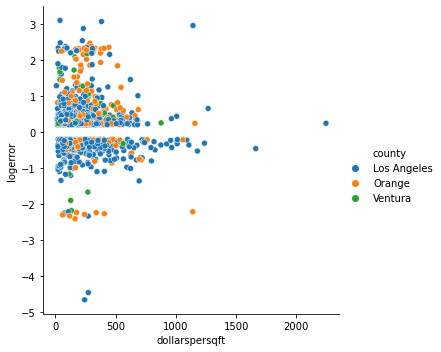

In [47]:
sns.relplot(data=train[(train.dollarspersqft < 2500) & (train.abserror > .2)], x='dollarspersqft', y='logerror', hue='county')

In [46]:
train[train.dollarspersqft >1000].describe()

,parcelid,bathrooms,bedrooms,sqft,fullbathcnt,latitude,garagecarcnt,garagesqft,longitude,lotsize,...,taxvalue,landtaxvalue,taxamount,logerror,age,abserror,Los Angeles,Orange,Ventura,dollarspersqft
count,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,...,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00,67.00
mean,"12,224,301.52",1.27,2.00,880.10,1.27,33.92,0.04,9.90,-118.27,"5,170.87",...,"1,099,882.96","858,101.78","12,819.50",-0.01,83.91,0.19,0.79,0.21,0.00,"1,333.53"
std,"1,059,907.61",0.45,0.83,273.84,0.45,0.19,0.21,48.80,0.23,"2,599.26",...,"253,951.14","227,667.46","2,891.34",0.49,15.98,0.45,0.41,0.41,0.00,453.61
min,"10,934,991.00",1.00,1.00,152.00,1.00,33.50,0.00,0.00,-118.51,"1,742.00",...,"314,726.00","179,800.00","4,263.53",-2.21,40.00,0.00,0.00,0.00,0.00,"1,007.19"
25%,"11,541,238.50",1.00,1.00,711.00,1.00,33.88,0.00,0.00,-118.42,"3,305.50",...,"927,713.50","726,402.00","10,840.87",-0.08,73.00,0.04,1.00,0.00,0.00,"1,055.73"
50%,"11,633,318.00",1.00,2.00,850.00,1.00,33.99,0.00,0.00,-118.38,"5,014.00",...,"1,100,000.00","912,018.00","12,974.96",-0.02,83.00,0.07,1.00,0.00,0.00,"1,152.71"
75%,"12,127,481.00",2.00,2.00,"1,061.50",2.00,34.08,0.00,0.00,-118.17,"6,274.50",...,"1,289,331.50","1,010,091.50","15,129.32",0.06,98.00,0.13,1.00,0.00,0.00,"1,435.68"
max,"14,421,093.00",2.00,5.00,"1,512.00",2.00,34.20,1.00,324.00,-117.74,"18,944.00",...,"1,522,874.00","1,216,000.00","17,842.91",2.96,129.00,2.96,1.00,1.00,0.00,"3,872.23"


In [50]:
train[(train.dollarspersqft < 2500) & (train.abserror > .2)].describe()

,parcelid,bathrooms,bedrooms,sqft,fullbathcnt,latitude,garagecarcnt,garagesqft,longitude,lotsize,...,taxvalue,landtaxvalue,taxamount,logerror,age,abserror,Los Angeles,Orange,Ventura,dollarspersqft
count,"1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00",...,"1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00","1,831.00"
mean,"12,634,711.81",1.96,3.04,"1,634.91",1.93,34.02,0.47,118.09,-118.22,"7,349.39",...,"350,084.32","222,797.97","4,362.63",0.20,69.17,0.47,0.73,0.21,0.06,217.05
std,"1,567,657.69",0.87,0.92,745.15,0.86,0.24,0.87,220.47,0.31,"3,369.85",...,"308,304.31","227,835.75","3,505.68",0.62,22.56,0.45,0.44,0.41,0.23,181.74
min,"10,712,007.00",1.00,1.00,326.00,1.00,33.34,0.00,0.00,-119.48,540.00,...,"11,683.00","4,729.00",254.56,-4.66,7.00,0.20,0.00,0.00,0.00,10.04
25%,"11,539,438.00",1.00,2.00,"1,107.50",1.00,33.87,0.00,0.00,-118.38,"5,444.00",...,"119,537.00","42,895.50","1,790.48",-0.23,57.00,0.24,0.00,0.00,0.00,80.15
50%,"12,220,614.00",2.00,3.00,"1,449.00",2.00,34.03,0.00,0.00,-118.21,"6,710.00",...,"260,268.00","155,403.00","3,412.90",0.25,69.00,0.32,1.00,0.00,0.00,185.08
75%,"13,872,419.50",2.50,4.00,"1,973.00",2.00,34.16,0.00,0.00,-118.01,"8,249.00",...,"472,384.50","311,355.50","5,785.50",0.41,83.00,0.48,1.00,0.00,0.00,288.69
max,"17,294,173.00",5.50,6.00,"5,243.00",5.00,34.72,7.00,"2,015.00",-117.58,"21,508.00",...,"1,607,584.00","1,205,653.00","18,937.70",3.10,135.00,4.66,1.00,1.00,1.00,"2,244.63"
